

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Word Embedding</center></h1>

<center><p float="center">
  <img src="https://images.pexels.com/photos/242492/pexels-photo-242492.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" width="720"/>
</p></center>

<center><font size=6>Articles Categorization</center></font>

## Problem Statement

### Business Context

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of articles spanning diverse topics. Ensuring that the right articles reaches the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, media organizations encounter challenges such as:
- Information Overload: The sheer volume of articles makes manual categorization impractical.
- Timeliness: Delays in categorizing articles can result in outdated or misplaced content.
- User Engagement: Providing personalized and relevant content is vital for sustaining user interest.

### Problem Definition

InfoWorld, a prominent player in the media landscape, faces these challenges on a monumental scale. With a vast repository of articles covering global affairs, entertainment, politics, and more, the need for an advanced and automated system to categorize articles has become increasingly evident. The manual efforts required for categorizing such a diverse range of articles are substantial, often leading to delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on InfoWorld's data team, the task is to analyze articles and construct a predictive model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery. Leveraging advanced machine learning techniques, the initiative aims to address technical challenges and pave the way for a seamless intersection of technology and media.

### Data Dictionary

- Date published: The date when the article or content was officially released or made public.
- Category: Categorization indicating the broad topic or subject of the content.
- Section: Subdivision within the publication that helps classify the content further.
- Headline: Brief and catchy title summarizing the main idea or topic of the content.
- Description: A short summary or overview of the content, providing additional context.
- Keywords: Relevant keywords or tags associated with the content for search engine optimization.
- Article text: The main body of the article or content containing detailed information and context.

## Importing the necessary libraries

In [ ]:
# Upgrade pip
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pyenv install 3.10.13
!pyenv virtualenv 3.10.13 word-embedding-env
!pyenv activate word-embedding-env

/bin/bash: line 1: pyenv: command not found
/bin/bash: line 1: pyenv: command not found
/bin/bash: line 1: pyenv: command not found


In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.3 tsfresh==0.20.0 thinc==8.1.10


In [ ]:
## Not rquired
!pyenv install 3.10.13
!pyenv virtualenv 3.10.13 gensim-tsfresh-env
!pyenv activate gensim-tsfresh-env

!pip install gensim tsfresh

/bin/bash: line 1: pyenv: command not found
/bin/bash: line 1: pyenv: command not found
/bin/bash: line 1: pyenv: command not found
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of tsfresh to determine which version is compatible with other requirements. This could take a while.
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: tsf

In [ ]:
# installing libraries to use word embeddings
!pip install gensim -q

In [ ]:
!python --version

Python 3.11.12


In [ ]:
#!pip install scipy==1.14.1
#!pip install numpy==2.0.0
!pip install gensim==4.3.3 numpy==1.26.4 scipy==1.13.3

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy==1.13.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.1

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Pi5_NLP/Articles.csv')

In [ ]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-15 09:57:36  business  investing   
4  2022-03-15 11:27:02  business   business   

                                                                                        Headline  \
0  There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                      This swarm of robots gets smarter the more it works - CNN   
3                  Russia is no longer an option for investors. These emerging markets are - CNN   
4                             Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                              Description  \
0                                                                                                                                   The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?   
1                                            Working in a factory can mean doing the same task over and over, which could lead to chronic injury.  A battery-powered glove from Swedish company Bioservo could help workers by taking some of the strain.   
2                                                                                 In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.   
3                                                                                                                 For many years, the world's most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.   
4  The European Union formally approved on Tuesday a new barrage of sanctions against Russia for its invasion of Ukraine, which include bans on investments in the Russian energy sector, luxury goods exports and imports of steel products from Russia.   

                                                                                               Keywords  \
0  world, There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                world, Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                       asia, This swarm of robots gets smarter the more it works - CNN   
3              investing, Russia is no longer an option for investors. These emerging markets are - CNN   
4                          business, Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# checking an article
data.loc[3, 'Article text']

'New York (CNN Business)For many years, the world\'s most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.But given that Russia is no longer a market that Westerners can access following the invasion of Ukraine, it might be time for investors to stop lumping all of the emerging markets together."The BRICS had their day in the sun and that has faded," said Eric Winograd, senior economist at AllianceBernstein.Several major US index providers have removed Russian stocks from indexes at a price of "zero" or "effectively zero." Trading shares of several leading US-listed Russian companies, such as search engine Yandex and telecom MTS, have been halted. And the Moscow Stock Exchange has been closed since February 25, the day after the invasion.Russia could default on its debt within days"The idea that a country as large as Russia can be removed from indexes is a big deal," Winograd said.Read MoreIt seems likely that Russia will not be inc

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(4076, 7)

* The data comprises of ~4k articles

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Date published,0
Category,0
Section,0
Headline,0
Description,0
Keywords,0
Article text,0


- There are no mising values in the data

### Checking the statistical summary

In [ ]:
data.describe()

Date published Category Section  \
count                  4076     4076    4076   
unique                 4076        6      37   
top     2021-07-15 02:46:59    sport   sport   
freq                      1     2176    1088   

                                                                                             Headline  \
count                                                                                            4076   
unique                                                                                           4071   
top     Ukrainian opposition demand investigation into failed sting operation detailed by CNN   - CNN   
freq                                                                                                2   

                                                                                                                                                   Description  \
count                                                                                                                                                     4076   
unique                                                                                                                                                    4069   
top     Austria's Chancellor Sebastian Kurz said in a televised speech he was stepping down from his office Saturday evening following corruption allegations.   
freq                                                                                                                                                         2   

                                                                                                     Keywords  \
count                                                                                                    4076   
unique                                                                                                   4071   
top     europe, Ukrainian opposition demand investigation into failed sting operation detailed by CNN   - CNN   
freq                                                                                                        2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

- There seem to a large number of articles from the sports category

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of article categories

<ipython-input-11-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


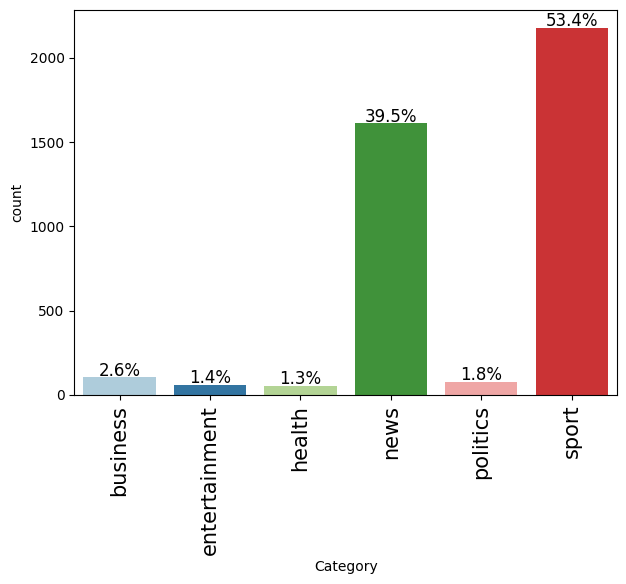

In [ ]:
labeled_barplot(data, "Category", perc=True)

- Majority of the articles in the data are sports articles (53%), followed by news articles (~40%)

#### Distribution of section

<ipython-input-11-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


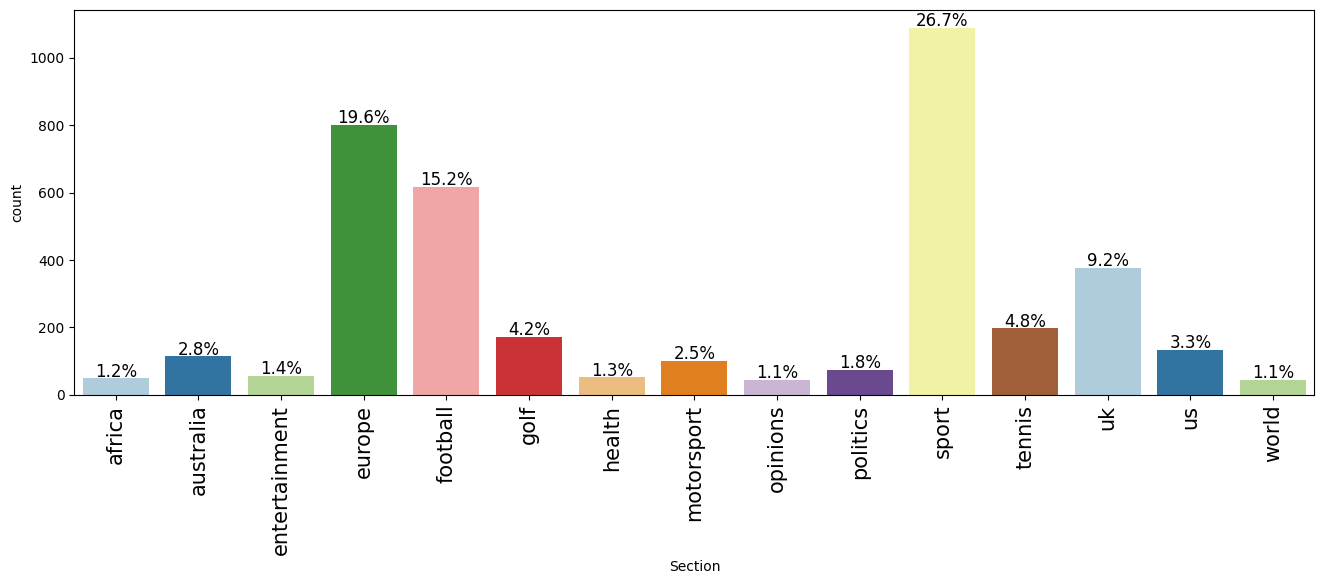

In [ ]:
labeled_barplot(data, "Section", perc=True, n = 15)

* The most common section articles in the data belong to are sports, europe, and football

#### Distribution of the year of publishing

In [ ]:
data['year'] = pd.to_datetime(data['Date published']).dt.year

<ipython-input-11-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


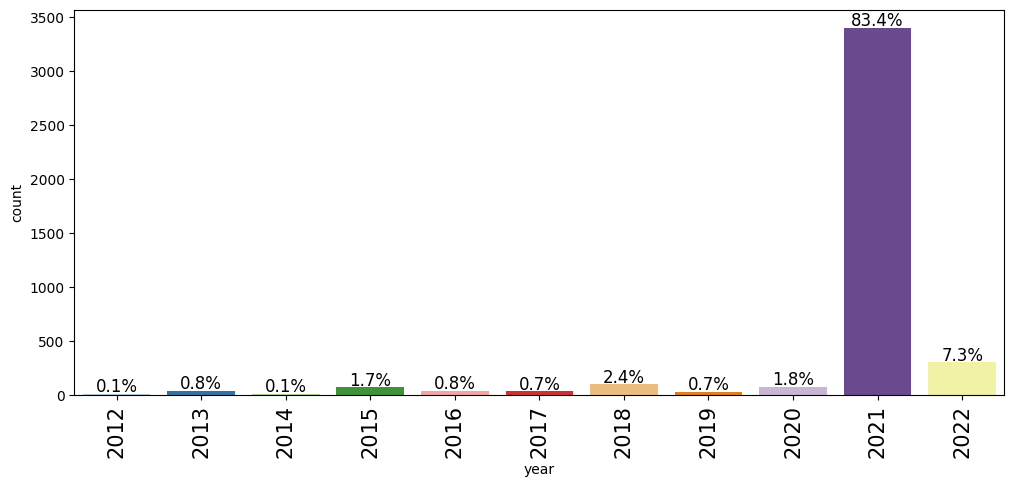

In [ ]:
labeled_barplot(data, "year", perc=True)

- Most of the articles are from the year 2021

## Data Preprocessing

In [ ]:
dataset = data.copy()

#### **Preprocessing the textual column**

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([ps.stem(word) for word in words])

    return text

In [ ]:
# preprocessing the textual column
dataset['Article_text_clean'] = dataset['Article text'].apply(preprocess_text)

In [21]:
dataset.head()

Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-15 09:57:36  business  investing   
4  2022-03-15 11:27:02  business   business   

                                                                                        Headline  \
0  There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                      This swarm of robots gets smarter the more it works - CNN   
3                  Russia is no longer an option for investors. These emerging markets are - CNN   
4                             Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                              Description  \
0                                                                                                                                   The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?   
1                                            Working in a factory can mean doing the same task over and over, which could lead to chronic injury.  A battery-powered glove from Swedish company Bioservo could help workers by taking some of the strain.   
2                                                                                 In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.   
3                                                                                                                 For many years, the world's most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.   
4  The European Union formally approved on Tuesday a new barrage of sanctions against Russia for its invasion of Ukraine, which include bans on investments in the Russian energy sector, luxury goods exports and imports of steel products from Russia.   

                                                                                               Keywords  \
0  world, There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                world, Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                       asia, This swarm of robots gets smarter the more it works - CNN   
3              investing, Russia is no longer an option for investors. These emerging markets are - CNN   
4                          business, Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## Word Embeddings

### **Word2Vec**

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['Article_text_clean'].values]
print('words_list', words_list, ' and number of items ', words_list.__len__())

Output hidden; open in https://colab.research.google.com to view.

In [20]:
print("Total number of items in words_list:", len(words_list))

Total number of items in words_list: 4076


In [22]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [23]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 103381


In [28]:
##
model_W2V.wv.key_to_index

{'the': 0,
 'to': 1,
 'of': 2,
 'and': 3,
 'in': 4,
 'a': 5,
 'that': 6,
 'on': 7,
 'for': 8,
 'it': 9,
 'is': 10,
 'wa': 11,
 'with': 12,
 'he': 13,
 'at': 14,
 'as': 15,
 'be': 16,
 'hi': 17,
 'from': 18,
 'have': 19,
 'i': 20,
 'said': 21,
 'ha': 22,
 'are': 23,
 'by': 24,
 'her': 25,
 'she': 26,
 'thi': 27,
 'but': 28,
 'an': 29,
 'not': 30,
 'they': 31,
 'who': 32,
 'we': 33,
 'their': 34,
 'will': 35,
 'after': 36,
 'been': 37,
 'had': 38,
 'say': 39,
 'were': 40,
 'year': 41,
 'more': 42,
 'photo': 43,
 'peopl': 44,
 'one': 45,
 'you': 46,
 'about': 47,
 'when': 48,
 'time': 49,
 'or': 50,
 'first': 51,
 'which': 52,
 'all': 53,
 'up': 54,
 'there': 55,
 'out': 56,
 'would': 57,
 'caption': 58,
 'like': 59,
 'just': 60,
 'also': 61,
 'what': 62,
 'so': 63,
 'world': 64,
 'game': 65,
 'team': 66,
 'us': 67,
 'my': 68,
 'other': 69,
 'new': 70,
 'go': 71,
 'over': 72,
 'than': 73,
 'can': 74,
 'told': 75,
 'dure': 76,
 'into': 77,
 'do': 78,
 'countri': 79,
 'two': 80,
 'day': 81,

Let's check out a few word embeddings obtained using the model.

In [24]:
# Checking the word embedding of a random word
word = "truck"
model_W2V.wv[word]

array([ 3.27086146e-03,  3.40518892e-01,  4.24046889e-02,  2.45464996e-01,
        2.48626649e-01, -4.21884090e-01, -2.48345844e-02,  2.96647280e-01,
        2.86419600e-01,  3.13224167e-01, -4.80934186e-03,  7.80324801e-04,
       -3.06044165e-02,  2.60031670e-01, -2.45387033e-01, -2.39484444e-01,
       -6.24228232e-02, -1.54047206e-01, -4.32040304e-01,  3.22369456e-01,
       -2.85073966e-01,  9.98319536e-02,  1.75516292e-01,  1.57552764e-01,
        1.20396979e-01,  1.60360299e-02, -5.62575981e-02, -4.40352112e-01,
       -4.55116540e-01, -3.34740579e-01, -3.68143544e-02, -4.44600314e-01,
        2.16509610e-01, -7.40502030e-02,  9.17429030e-02,  9.71145779e-02,
        5.06148487e-03, -2.60085344e-01, -4.08618301e-02,  2.30519846e-01,
       -1.76847383e-01,  5.11070825e-02, -3.65800738e-01, -1.47085518e-01,
        2.46038601e-01,  4.98854974e-03, -1.38685063e-01, -1.08921863e-01,
       -1.73893332e-01,  1.67331234e-01,  1.18636802e-01, -1.22307763e-01,
       -3.29302967e-01, -

In [ ]:
# Checking the word embedding of a random word
word = "robot"
model_W2V.wv[word]

array([-0.04886977,  0.30631498,  0.14985822, -0.03797175,  0.23936282,
       -0.19802487,  0.36983445,  0.59524965,  0.40272567, -0.19154331,
       -0.0561035 , -0.02774264,  0.10653304,  0.06828514,  0.13516822,
       -0.2624122 ,  0.10025736,  0.20652376, -0.16517189,  0.40106964,
       -0.22695868, -0.23397051,  0.39793667,  0.09695083, -0.19256675,
        0.23593429,  0.07398281, -0.32512587, -0.0100012 , -0.04879604,
        0.0022178 ,  0.07680922, -0.09182481,  0.20162533, -0.14927272,
        0.3670031 , -0.000843  , -0.09250966, -0.35216177,  0.12220562,
        0.17752323, -0.10913673,  0.4677985 , -0.11539483,  0.45962906,
        0.29023212, -0.28674105, -0.14027613, -0.24219552, -0.01672644,
        0.24735728, -0.17299478, -0.24258617, -0.19631377, -0.20927572,
       -0.3527538 ,  0.26499063,  0.10410006,  0.20433551, -0.30602977,
       -0.09538928, -0.15192778,  0.01661816, -0.16264005,  0.29106012,
       -0.17133698, -0.13273431,  0.1367217 , -0.604342  , -0.11

In [ ]:
# Checking the word embedding of a random word
word = "market"
model_W2V.wv[word]

array([-0.31473264, -0.4948494 ,  0.438747  ,  0.5722002 , -0.05602052,
        0.19190699,  0.42768472, -0.03823858,  0.5212723 ,  0.10788385,
       -0.59929746,  0.2910451 ,  0.00529936, -0.2078784 ,  0.00779187,
       -0.3081786 ,  0.42753887,  0.3043627 , -0.50793135,  0.7236817 ,
        0.03412197,  0.33141416,  0.79781145,  0.2883991 , -0.13768831,
       -0.4827706 ,  0.05298771,  0.5227639 , -0.13276027, -0.6011752 ,
        0.3370725 ,  0.30511793,  0.15800464,  0.3506971 , -0.09406114,
        0.00418789,  0.18826972, -0.998909  , -1.140143  ,  0.47916368,
       -0.20300496, -0.4058175 ,  0.34926686,  0.08427973, -0.72204715,
       -0.18149261, -0.52320266,  0.12186141,  0.04851672, -0.38873097,
        0.26978102, -0.19575362,  0.06390801, -0.5078601 , -0.6602938 ,
       -0.2943042 ,  0.40916774,  0.21479444,  0.04272943,  0.3371882 ,
       -0.16293438,  0.02474739, -0.05989403, -0.54541636,  0.07345774,
       -0.10672683, -0.6011429 , -0.0405538 ,  0.10921417, -0.78

In [29]:
model_W2V.wv.key_to_index.keys()

dict_keys(['the', 'to', 'of', 'and', 'in', 'a', 'that', 'on', 'for', 'it', 'is', 'wa', 'with', 'he', 'at', 'as', 'be', 'hi', 'from', 'have', 'i', 'said', 'ha', 'are', 'by', 'her', 'she', 'thi', 'but', 'an', 'not', 'they', 'who', 'we', 'their', 'will', 'after', 'been', 'had', 'say', 'were', 'year', 'more', 'photo', 'peopl', 'one', 'you', 'about', 'when', 'time', 'or', 'first', 'which', 'all', 'up', 'there', 'out', 'would', 'caption', 'like', 'just', 'also', 'what', 'so', 'world', 'game', 'team', 'us', 'my', 'other', 'new', 'go', 'over', 'than', 'can', 'told', 'dure', 'into', 'do', 'countri', 'two', 'day', 'if', 'last', 'no', 'some', 'get', 'against', 'player', 'cnn', 'state', 'report', 'play', 'now', 'take', 'make', 'our', 'win', 'olymp', 'women', 'could', 'them', 'him', 'work', 'vaccin', 'befor', 'becaus', 'want', 'me', 'how', 'govern', 'where', 'nation', 'come', 'famili', 'back', 'onli', 'right', 'think', 'mani', 'accord', 'sport', 'most', 'while', 'call', 'home', 'look', 'use', 'even

In [30]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [32]:
len(wvs)

103381

In [33]:
word_vector_dict

Output hidden; open in https://colab.research.google.com to view.

In [34]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [36]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(dataset['Article_text_clean'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,0.264998,-0.204334,0.218082,0.300920,0.003124,-0.089378,0.514977,-0.089925,0.193851,0.325948,...,-0.092005,-0.221174,-0.268404,-0.063562,0.103519,0.319774,-0.046273,-0.042350,0.197691,0.558188
1,0.200386,-0.114503,0.209281,0.312306,0.017082,-0.112960,0.607829,-0.035608,0.195254,0.250503,...,-0.098198,-0.260724,-0.273370,-0.053457,0.136353,0.331600,-0.058324,-0.020958,0.214113,0.533360
2,0.250577,-0.150132,0.290260,0.269557,0.052776,-0.119525,0.552554,-0.013469,0.262668,0.233860,...,-0.091010,-0.232399,-0.240669,-0.029674,0.235680,0.342574,-0.119777,0.009629,0.111710,0.515782
3,0.186854,-0.149438,0.147804,0.238718,-0.086084,0.043090,0.588406,-0.033289,0.158855,0.264270,...,-0.163638,-0.343889,-0.211614,-0.073148,0.075118,0.295183,-0.060158,-0.078947,0.378868,0.524835
4,0.153862,-0.157216,0.165379,0.082811,-0.051516,0.180888,0.479495,-0.267115,0.240667,0.302639,...,-0.059118,-0.121069,-0.184265,-0.108054,0.064038,0.316942,0.067118,-0.035390,0.410169,0.603188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,0.280316,-0.262183,0.162273,0.285120,-0.197797,-0.194292,0.504384,-0.164782,-0.153670,0.222793,...,-0.114213,-0.133967,-0.102684,0.007258,0.020691,0.113015,-0.041611,-0.032646,0.275397,0.670506
4072,0.573306,-0.681772,0.156341,0.292236,-0.009797,0.055315,-0.098128,-0.441207,0.079319,0.359053,...,0.010920,0.053070,-0.211641,0.043781,0.042172,0.335885,-0.028620,0.000044,0.204032,0.703138
4073,0.103645,0.046756,0.193998,0.216727,-0.105826,-0.243566,0.790743,0.074751,-0.017531,0.288280,...,-0.110208,-0.096967,-0.083970,0.013203,-0.024387,0.246976,0.006598,-0.109223,0.165399,0.615555
4074,0.105845,-0.180155,0.112060,0.289259,-0.058108,-0.109435,0.581091,-0.114374,0.207176,0.286784,...,-0.057104,-0.214115,-0.250191,-0.118332,0.082195,0.292700,0.006461,-0.002950,0.358802,0.509420


In [37]:
df_Word2Vec.shape

(4076, 300)

### **GloVe**

In [40]:
glove_input_file = '/content/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-40-a2ffa449b7b1>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(119475, 100)

In [41]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [68]:
glove_model.index_to_key[0:10]

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [42]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 119475


In [ ]:
# Checking the word embedding of a random word
word = "truck"
glove_model[word]

array([-0.13959  ,  0.053049 ,  0.098775 , -0.75656  ,  0.18649  ,
       -0.5453   ,  0.51948  ,  1.031    ,  0.53502  ,  0.48639  ,
        0.27249  ,  0.15508  ,  0.40621  ,  0.18081  , -0.025307 ,
        0.26865  ,  0.38571  , -0.21049  , -0.28851  ,  0.48076  ,
        1.0103   ,  0.11727  ,  0.4438   , -0.044604 ,  0.31954  ,
        0.105    , -1.046    , -0.045288 ,  0.26557  ,  0.2942   ,
        0.044758 ,  0.21819  , -0.31754  , -0.24927  ,  0.0386   ,
       -0.018294 ,  0.48484  ,  0.2406   ,  1.4252   ,  0.60919  ,
        0.62857  , -0.9181   ,  0.67407  , -0.049386 ,  0.32595  ,
        0.5808   , -0.064496 ,  0.097091 , -0.29634  , -0.49801  ,
       -0.5079   ,  0.15151  , -0.28035  ,  1.4427   ,  0.18603  ,
       -0.93646  , -1.2371   ,  0.76921  ,  2.1535   ,  0.24301  ,
        0.43864  ,  0.16485  ,  0.61097  ,  0.34103  ,  0.31127  ,
       -0.021241 ,  0.18143  , -0.24922  , -0.50407  ,  0.36803  ,
       -0.40437  , -0.78135  ,  0.3406   , -0.33441  ,  0.3922

In [ ]:
# Checking the word embedding of a random word
word = "robot"
glove_model[word]

array([ 0.011902 ,  0.26278  ,  0.45126  ,  0.12094  , -0.41535  ,
       -0.35435  ,  0.0092189, -0.034586 ,  0.32158  ,  0.18078  ,
        0.11859  , -0.71212  ,  0.81706  , -0.33606  , -0.08437  ,
        0.62526  ,  0.46727  ,  1.4349   ,  0.5169   ,  0.26811  ,
        0.59619  , -0.61252  , -0.36577  , -0.53652  ,  0.66653  ,
        0.5401   , -1.0361   ,  0.42182  , -0.061063 ,  0.72207  ,
       -0.6181   ,  0.27911  , -0.41123  , -0.030808 ,  1.0171   ,
        0.02397  , -0.77087  , -0.31841  ,  0.81663  , -0.31675  ,
        0.15844  , -0.036592 , -0.42598  , -0.33789  , -0.41276  ,
        0.59072  , -0.8522   ,  0.5816   ,  0.29178  ,  0.65402  ,
       -0.54697  ,  0.29809  ,  0.29886  ,  0.85476  ,  0.38412  ,
       -0.98124  , -0.060437 ,  0.50573  ,  0.3828   ,  0.68482  ,
        0.85488  ,  0.98631  ,  0.31926  ,  0.60156  ,  0.26016  ,
        0.43938  , -0.59457  ,  0.15845  , -0.0029536,  0.51893  ,
        0.80057  , -0.11206  , -0.11446  ,  0.25445  , -0.2818

In [ ]:
# Checking the word embedding of a random word
word = "market"
glove_model[word]

array([ 0.39093  ,  0.23755  ,  0.44855  ,  0.11237  , -0.25996  ,
       -1.2248   , -0.44237  , -0.53491  ,  0.37142  , -0.61981  ,
       -0.27387  , -0.032213 ,  0.082629 , -0.52986  ,  0.13012  ,
        0.21703  , -0.45026  , -0.0048895,  0.34887  , -0.26069  ,
        0.56598  , -0.36219  ,  0.41926  ,  0.23441  , -0.29407  ,
       -0.27044  ,  0.29339  , -0.73905  , -0.75965  ,  0.64661  ,
       -0.038757 ,  0.38495  , -0.32314  ,  0.040322 ,  0.24036  ,
        0.35167  ,  0.47404  ,  0.014959 ,  0.12105  , -1.0398   ,
        0.27639  , -1.3785   , -0.22851  , -0.098074 ,  0.1495   ,
       -0.2815   ,  0.31682  , -0.10208  , -0.08586  , -1.5114   ,
       -0.48255  ,  0.15131  ,  0.0080133,  0.74594  , -0.20163  ,
       -2.5268   , -0.82083  ,  0.1143   ,  2.4665   ,  0.19841  ,
        0.1146   ,  0.10083  , -0.60936  ,  0.76722  ,  0.025978 ,
       -0.036936 ,  0.46744  , -0.77073  ,  0.83992  , -0.032931 ,
       -0.13127  , -0.097367 , -0.42634  , -0.49478  , -0.4079

In [70]:
len(glove_model.vectors)

119475

In [43]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [49]:
glove_words[:15]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is']

In [45]:
len(glove_words)

119475

In [52]:
glove_word_vector_dict.get('the') ## from the dictionary

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [66]:
len(glove_word_vector_dict.get('the'))

100

In [53]:
vec_size=100

In [71]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    print('feature_vector => ', feature_vector)

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    print('feature_vector => ', feature_vector)
    print('len(words_in_vocab) => ', len(words_in_vocab))

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [64]:
np.array(glove_word_vector_dict.get('the'))

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [56]:
dataset['Article_text_clean'][0:1]

0    cnnright now there a shortag of truck driver in the us and worldwid exacerb by the ecommerc boom brought on by the pandem one solut to the problem is autonom truck and sever compani are in a race to be the first to launch one among them is san diegobas tusimplefound in tusimpl ha complet about million mile of road test with it prototyp truck across the us china and europ although these are simpli commerci avail truck retrofit with it technolog tusimpl ha deal in place with two of the world largest truck manufactur navistar in the us and traton volkswagen truck busi in europ to design and build fulli autonom model which it hope to launch by photo the yara birkeland is what it builder call the world first zeroemiss autonom cargo ship the ship is schedul to make it first journey between two norwegian town befor the end of the year click through to see more form of transport set to transform the futurehid caption of photo pictur here as a render oceanbird is a windpow transatlant car carrier that cut carbon emiss by compar to a standard car carrierhid caption of photo it not just maritim ship that are go green citi around the world are adopt electr ferri norwegian startup zeabuz hope it selfdriv electr ferri pictur here as a render will help reviv urban waterwayshid caption of photo in china a new maglev highspe train roll off the product line in qingdao east china shandong provinc on juli it ha a top speed of km per hour current the fastest ground vehicl avail global hide caption of photo reach speed of up to kilomet mile per hour hyperloop could be a sustain replac to shorthaul flight dutch compani hardt shown here as a render start work on it hyperloop test facil in europ anticip to open in hide caption of photo hyperloop is like a bullet train without track and rail float pod are propel through a lowpressur steel tube use magnet levit virgin ha been run test with passeng on it xp vehicl pictur herehid caption of photo low carbon travel isnt just about switch to sustain fuel sourc it also about redesign the transport itself a flyingv plane design by delft univers of technolog in the netherland and dutch airlin klm can cut fuel consumpt by ultim research hope to switch out the kerosen with a sustain fuel sourc like liquid hydrogenhid caption of photo hydrogen aviat could provid a sustain solut for short and mediumhaul flight in septemb airbu unveil plan for three hydrogenpow zeroemiss aircraft which can carri to passeng it hope to launch the first zero aircraft in hide caption of photo in decemb canadian airlin harbour air flew the world first allelectr zeroemiss commerci aircraft the sixseat seaplan wa retrofit with magnix magni allelectr motor harbour air which carri half a million passeng annual hope to becom the world first allelectr airlin hide caption of photo in the case of electr bike the futur is now one retail report the sale of ebik and escoot had increas thi year ebik give the user a boost to their pedal allow them to go further with less effort ebik are now even avail on rideshar app like uberhid caption of photo while sleeper train or buse might be the way most of us get some shutey on overnight travel thi render of a selfdriv hotel suit from torontobas design steve lee of aprilli design studio might offer a plush altern in the futurehid caption of photo in the uae these futuristiclook pod are undergo test on a meter line in sharjah which border dubai belarusbas uski transport say it pod can help citi solv traffic problemshid caption of photo the coradia ilint by french rail transport compani alstom is the world first hydrogenpow passeng train it began test in germani in and in septemb enter regular servic in austriahid caption of no sleeptusimpl latest road test involv haul fresh produc mile from nogal arizona to oklahoma citi the pickup and the dropoff were handl by a human driver but for the bulk of the rout from tucson to dalla the truck drove itself read moretoday becaus the system is not fulli readi we h

In [60]:
dataset['Article_text_clean'][0:1].apply(average_vectorizer_GloVe)

,Article_text_clean
0,"[-0.13582362770394504, 0.13356995170818772, 0.3429159020668837, -0.19050767169569888, 0.0692991381067883, 0.05402269931136862, -0.12131749960123261, 0.2496508905778825, -0.1520691538018477, 0.0982360108208807, 0.09246595024318437, 0.009037022517057913, 0.2310839792388114, 0.010865776077727568, 0.13980543706325538, -0.19540706453871148, 0.27155942306168607, 0.03927099216149804, -0.30145004685890453, 0.09906550460273741, 0.297529573142998, -0.05962760367972512, 0.2174530169679028, 0.07318265845870241, 0.24962630449788692, -0.12922221484842478, -0.12031539822896534, -0.34595378487296263, 0.02782863155228967, -0.12657260656069308, -0.15925241643558538, 0.39015381052826503, -0.0715624451158777, 0.07218294910656908, 0.014413611977606074, 0.23998186562699675, 0.05422923209533254, 0.2528885913922471, 0.03269537402207292, -0.06504643539365482, -0.3178067917107139, -0.31293370716977087, 0.08654533677648636, -0.25424350846460253, 0.015980729370718528, 0.0961847427389605, 0.17577686637604498, -0.2867248409629479, -0.10908485764929028, -0.5858919372475655, -0.0221512997244122, -0.011211218542297492, 0.08878881512991221, 1.0317583430937358, -0.22388170367403046, -2.21334977457434, -0.10781895099750106, -0.1717658723378233, 1.6015533480802568, 0.39281262598824124, -0.14069828079374386, 0.6290302453865866, -0.10715368338181178, 0.17809271691861267, 0.6096646468016291, 0.04949132174828761, 0.2954864937175851, 0.24897448939175632, 0.15649181122023556, -0.15392200935438233, -0.022466631513023336, -0.2522391357670017, -0.10351200296375003, -0.3419800292512165, 0.18617206103294975, 0.08418932997844075, -0.025256934550368624, -0.01147265142712549, -0.8403048349498335, -0.021244922997494115, 0.5649410839350463, 0.07935037350462272, -0.4395717787871262, 0.1754742988578107, -1.153437739763579, -0.14511028833274128, 0.12952796502316424, -0.15501114734318447, -0.03581567389485832, -0.2642333653149572, 0.020110214400628865, -0.015413192686872381, -0.12698448653408045, 0.06273654103531517, -0.4267599028075212, -0.06443230109179944, -0.14025575128499265, -0.2521047179892475, 0.6156189294319667, 0.08872646106358643]"


In [72]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(dataset['Article_text_clean'][0:1].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
##[0:1] to be removed

feature_vector =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
feature_vector =>  [ -216.91033344   213.31121288   547.6366956   -304.2407517
   110.67072356    86.2742508   -193.74404686   398.69247225
  -242.85443862   156.88290928   147.66812254    14.43212496
   369.04111484    17.3526444    223.26928299  -312.06508207
   433.68039863    62.71577448  -481.41572483   158.20761085
   475.15472831   -95.22528308   347.2724681    116.87270556
   398.65320828  -206.36787711  -192.14369097  -552.48819444
    44.44232459  -202.13645268  -254.32610905   623.07563541
  -114.28522485   115.27616972    23.01853833   383.25103941
    86.60408366   403.86308045    52.21451231  -103.87915732
  -507.53744636  -499.75513035   138.21290283  

In [63]:
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.135824,0.13357,0.342916,-0.190508,0.069299,0.054023,-0.121317,0.249651,-0.152069,0.098236,...,0.02011,-0.015413,-0.126984,0.062737,-0.42676,-0.064432,-0.140256,-0.252105,0.615619,0.088726


## Model Building

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = encoder.classes_.tolist()
    sns.heatmap(cm, annot = True,  fmt = '.0f',cmap='Blues', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Random Forest with Word2Vec

In [ ]:
# Storing independent variable
X = df_Word2Vec.copy()

# Storing target variable
y = dataset['Category']

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# applying the encoder mapping from training labels to test labels
y_test_enc = encoder.transform(y_test)

#### RF Base model

In [ ]:
# Building the model
rf_word2vec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_word2vec_base.fit(X_train, y_train_enc)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_base = rf_word2vec_base.predict(X_train)

# Predicting on test data
y_pred_test_base = rf_word2vec_base.predict(X_test)

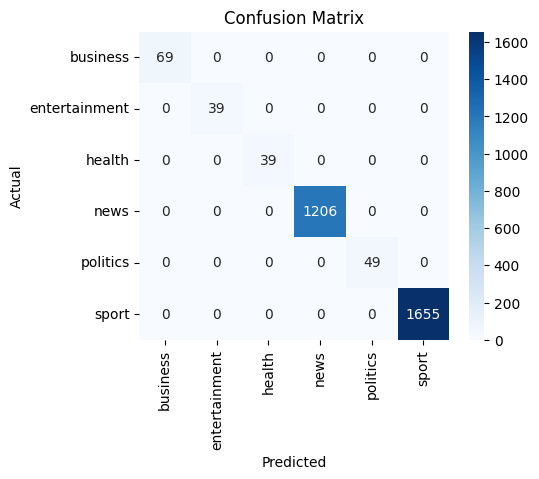

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_base)

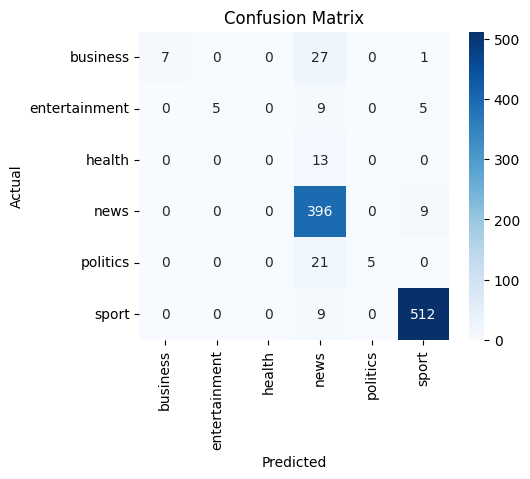

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_base)

In [ ]:
#Calculating different metrics on training data
word2vec_base_train=model_performance_classification_sklearn(rf_word2vec_base, X_train,y_train_enc)
print("Training performance:\n", word2vec_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
word2vec_base_test=model_performance_classification_sklearn(rf_word2vec_base, X_test,y_test_enc)
print("Testing performance:\n", word2vec_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907753  0.907753   0.906588  0.884729


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train_enc)

# Set the clf to the best combination of parameters
word2vec_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
word2vec_rf_tuned.fit(X_train, y_train_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_tuned = word2vec_rf_tuned.predict(X_train)

# Predicting on test data
y_pred_test_tuned = word2vec_rf_tuned.predict(X_test)

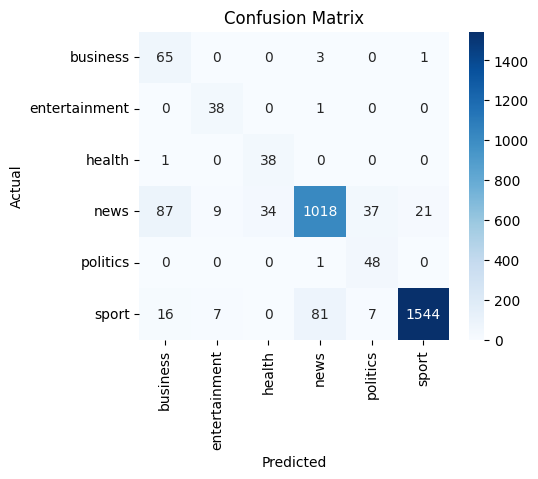

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_tuned)

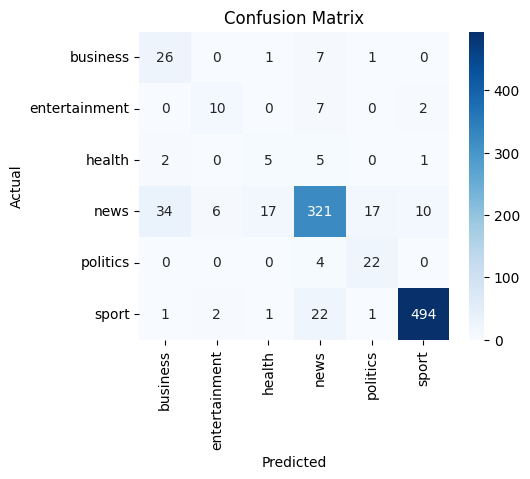

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_tuned)

In [ ]:
#Calculating different metrics on training data
word2vec_tuned_train=model_performance_classification_sklearn(word2vec_rf_tuned, X_train,y_train_enc)
print("Training performance:\n", word2vec_tuned_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.899902  0.899902   0.930303  0.909139


In [ ]:
#Calculating different metrics on training data
word2vec_tuned_test=model_performance_classification_sklearn(word2vec_rf_tuned, X_test,y_test_enc)
print("Testing performance:\n", word2vec_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861629  0.861629    0.88764  0.870849


### Random Forest with GloVe

In [ ]:
# Storing independent variable
X = df_Glove.copy()

# Storing target variable
y = dataset['Category']

In [ ]:
# Split data into training and testing set.
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc_glove = encoder.fit_transform(y_train_glove)

# applying the encoder mapping from training labels to test labels
y_test_enc_glove = encoder.transform(y_test_glove)

#### RF Base model

In [ ]:
# Building the model
rf_glovec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_glovec_base.fit(X_train_glove, y_train_enc_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_base_gl = rf_glovec_base.predict(X_train_glove)

# Predicting on test data
y_pred_test_base_gl = rf_glovec_base.predict(X_test_glove)

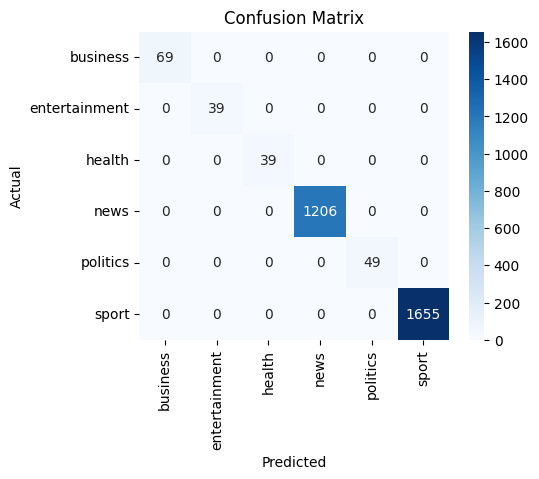

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_base_gl)

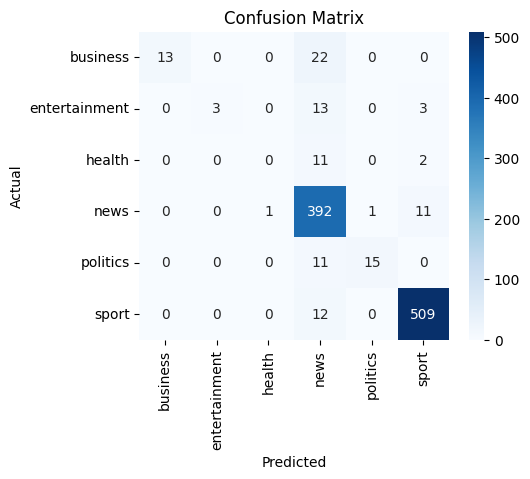

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_base_gl)

In [ ]:
#Calculating different metrics on training data
glove_base_train=model_performance_classification_sklearn(rf_glovec_base, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
glove_base_test=model_performance_classification_sklearn(rf_glovec_base, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.914622  0.914622   0.910578  0.899329


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
glove_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_enc_glove)

# Set the clf to the best combination of parameters
glove_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
glove_rf_tuned.fit(X_train_glove, y_train_enc_glove)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_tuned_gl = glove_rf_tuned.predict(X_train_glove)

# Predicting on test data
y_pred_test_tuned_gl = glove_rf_tuned.predict(X_test_glove)

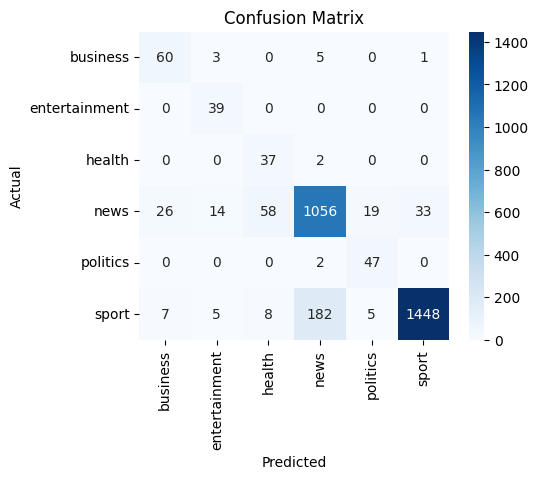

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_tuned_gl)

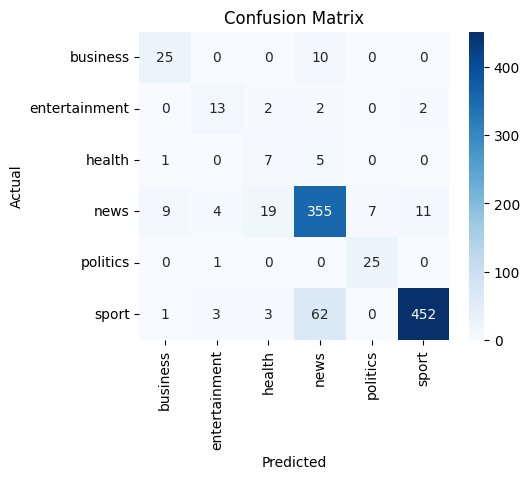

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_tuned_gl)

In [ ]:
#Calculating different metrics on training data
glove_tuned_train=model_performance_classification_sklearn(glove_rf_tuned, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_tuned_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878966  0.878966   0.900951  0.885326


In [ ]:
#Calculating different metrics on training data
glove_tuned_test=model_performance_classification_sklearn(glove_rf_tuned, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.860648  0.860648   0.880303  0.867467


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [word2vec_base_train.T,word2vec_tuned_train.T,glove_base_train.T,glove_tuned_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,1.0,0.899902,1.0,0.878966
Recall,1.0,0.899902,1.0,0.878966
Precision,1.0,0.930303,1.0,0.900951
F1,1.0,0.909139,1.0,0.885326


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [word2vec_base_test.T,word2vec_tuned_test.T,glove_base_test.T,glove_tuned_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,0.907753,0.861629,0.914622,0.860648
Recall,0.907753,0.861629,0.914622,0.860648
Precision,0.906588,0.887640,0.910578,0.880303
F1,0.884729,0.870849,0.899329,0.867467


* From the above two metric tables, we can observe that **Word2vec - RF with Grid Search** model is giving generalized results.

In [ ]:
label_list = encoder.classes_.tolist()
print(classification_report(y_test_enc, y_pred_test_tuned, target_names=label_list))

               precision    recall  f1-score   support

     business       0.41      0.74      0.53        35
entertainment       0.56      0.53      0.54        19
       health       0.21      0.38      0.27        13
         news       0.88      0.79      0.83       405
     politics       0.54      0.85      0.66        26
        sport       0.97      0.95      0.96       521

     accuracy                           0.86      1019
    macro avg       0.59      0.71      0.63      1019
 weighted avg       0.89      0.86      0.87      1019



## Conclusion

- We analyzed the distribution of categories of the article.

- We used different text processing techniques to clean the raw text data.

- We then built ML models (Random Forest) with the word embeddings created using Word2vec and GloVe.

- We then tuned the ML models built using GridSearch to improve the performance

- The tuned Random Forest model using Word2vec embeddings is taken as our final model as it has a good performance overall (86\% accuracy and 86\% recall).
    - The model can be tuned further or a different model can be trained to model the data better.

- The company can deploy this model to categorize future articles based on the article text.

- The model does well in the sports, politics, news, and business categories. This coincides with the categories where the number of training and testing samples were higher in number.

- The model does not do very well in the entertainment and health categories as there aren't many training samples available here.
    - The company can collect more samples of these categories and retrain the model to get a better prediction.

<font size=6 color='blue'>Power Ahead</font>
___